## Name: Prathamesh .P. Naukarkar

## Task: Stock Market Prediction And Forecasting Using Stacked LSTM

### Importing Libraries

In [112]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
print(df)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [114]:

df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [115]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [116]:

df.index

RangeIndex(start=0, stop=2035, step=1)

In [117]:

df.shape

(2035, 8)

In [118]:
df.size

16280

In [119]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [120]:

df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [121]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [122]:

df_close = df['Close']
df_close.shape

(2035,)

In [123]:
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [124]:

df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [125]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [127]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [128]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)  

In [129]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [130]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### CREATING THE MODEL ###

In [131]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 220ms/step - loss: 0.0269 - val_loss: 0.0087
Epoch 2/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 3/100
23/23 [==============================] - 4s 195ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/100
23/23 [==============================] - 5s 204ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 5s 208ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 5s 197ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 7/100
23/23 [==============================] - 5s 206ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
23/23 [==============================] - 5s 215ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/100
23/23 [==============================] - 5s 216ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 5s 220ms/step - loss: 9.6228e-04 - v

In [137]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [138]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Plot the graph


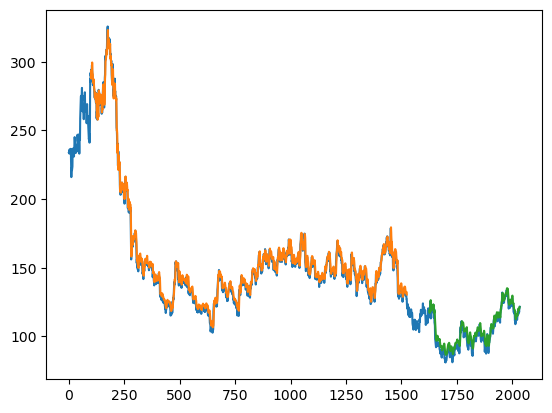

In [140]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [141]:
len(test_data)

509

In [142]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [143]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [144]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17264971]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

9 day output [[0.21375653]]
10 day input [0.11846405 0.14644608 0.14808007 0.15910948 0.15992647 0.15788399
 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673
 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327

17 day output [[0.24688244]]
18 day input [0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.17264971 0.17700732
 0.18182361 0.186670

25 day output [[0.27460417]]
26 day input [0.18055556 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248
 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366
 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876 0.21098856
 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.17264971 0.17700732 0.18182361 0.18667042
 0.19141138 0.19604145 0.20057979 0.20503989 0.20942995 0.21375653
 0.21802634 0.2222464

In [145]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df)

2035

### This is the graph of actual values in last 100 days

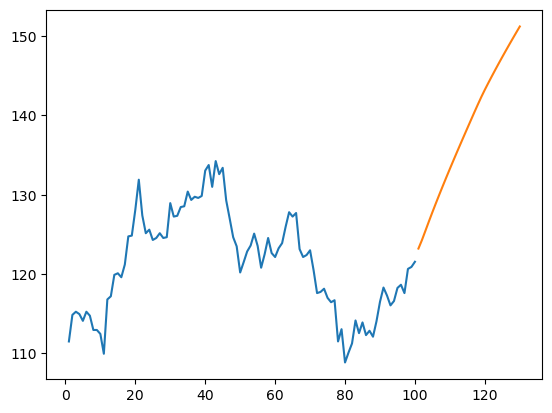

In [146]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

### This is the graph of predicted values for next 30 days

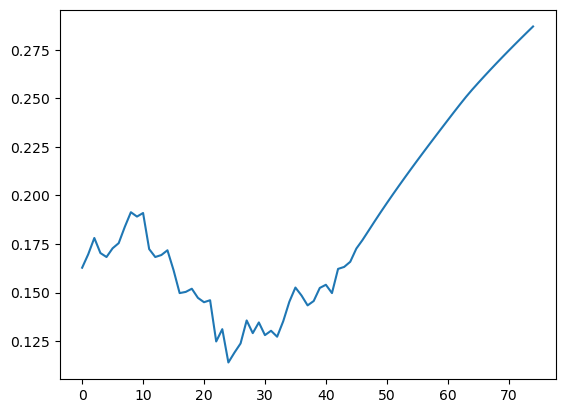

In [147]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1990:])

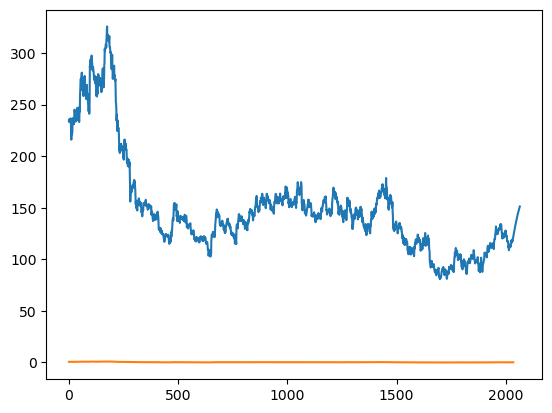

In [148]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.plot(df)